In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('final_2024.csv')
df = df[df['Wk'] == 1.0]
df

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,...,ACrs.1,AInt.2,ATklW.1,APKwon,APKcon,AOG,ARecov,AWon,ALost.1,AWon%
0,1.0,Fri,2023-08-11,20:00,Burnley,0.3,0–3,1.9,Manchester City,21572.0,...,15,4,12,0,0,0,54,13,13,50.0
1,1.0,Sat,2023-08-12,12:30,Arsenal,0.8,2–1,1.2,Nott'ham Forest,59984.0,...,6,8,10,0,0,0,34,20,12,62.5
2,1.0,Sat,2023-08-12,15:00,Everton,2.7,0–1,1.5,Fulham,39940.0,...,11,4,4,0,0,0,43,14,9,60.9
3,1.0,Sat,2023-08-12,15:00,Sheffield Utd,0.5,0–1,1.9,Crystal Palace,31194.0,...,17,4,9,0,0,0,55,31,13,70.5
4,1.0,Sat,2023-08-12,15:00,Brighton,4.0,4–1,1.5,Luton Town,31872.0,...,22,9,12,0,1,0,41,21,12,63.6
5,1.0,Sat,2023-08-12,15:00,Bournemouth,1.3,1–1,1.1,West Ham,11245.0,...,14,6,19,0,0,0,52,29,16,64.4
6,1.0,Sat,2023-08-12,17:30,Newcastle Utd,3.3,5–1,1.8,Aston Villa,52207.0,...,16,6,10,0,0,0,44,6,5,54.5
7,1.0,Sun,2023-08-13,14:00,Brentford,2.2,2–2,1.3,Tottenham,17066.0,...,23,10,10,0,1,0,50,11,15,42.3
8,1.0,Sun,2023-08-13,16:30,Chelsea,1.4,1–1,1.3,Liverpool,40096.0,...,12,10,9,0,0,0,62,6,11,35.3
9,1.0,Mon,2023-08-14,20:00,Manchester Utd,2.2,1–0,2.2,Wolves,73358.0,...,23,18,10,0,0,0,69,17,7,70.8


In [2]:
# Calculate correlation matrix
df_numeric = df.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()
df_numeric

,Wk,xG,xG.1,Attendance,match_id,Home Score,Away Score,HMin,HGls,HAst,...,ACrs.1,AInt.2,ATklW.1,APKwon,APKcon,AOG,ARecov,AWon,ALost.1,AWon%
0,1.0,0.3,1.9,21572.0,0,0,3,989,0,0,...,15,4,12,0,0,0,54,13,13,50.0
1,1.0,0.8,1.2,59984.0,1,2,1,990,2,2,...,6,8,10,0,0,0,34,20,12,62.5
2,1.0,2.7,1.5,39940.0,2,0,1,990,0,0,...,11,4,4,0,0,0,43,14,9,60.9
3,1.0,0.5,1.9,31194.0,3,0,1,990,0,0,...,17,4,9,0,0,0,55,31,13,70.5
4,1.0,4.0,1.5,31872.0,4,4,1,990,4,2,...,22,9,12,0,1,0,41,21,12,63.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,38.0,1.1,3.4,17124.0,375,2,4,990,2,2,...,8,8,10,0,0,0,56,4,9,30.8
376,38.0,1.1,2.2,39724.0,376,2,1,990,2,1,...,20,12,16,0,0,0,49,14,12,53.8
377,38.0,2.5,0.9,25191.0,377,5,0,990,5,4,...,10,2,2,0,0,0,28,9,9,50.0
378,38.0,4.5,0.5,60059.0,378,2,0,990,2,1,...,5,3,11,0,0,0,35,4,14,22.2


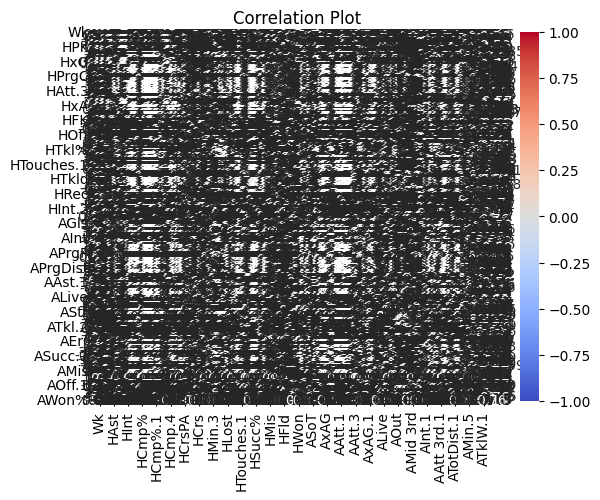

In [11]:
# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add title and labels
plt.title("Correlation Plot")
plt.show()

In [27]:
from sklearn.feature_selection import VarianceThreshold

# Set a variance threshold (e.g., 0 to remove constant columns)
selector = VarianceThreshold(threshold=0.001)
df_high_variance = df_numeric[df_numeric.columns[selector.fit(df_numeric).get_support(indices=True)]]
df_high_variance

,Wk,xG,xG.1,Attendance,match_id,Home Score,Away Score,HMin,HGls,HAst,...,ACrs.1,AInt.2,ATklW.1,APKwon,APKcon,AOG,ARecov,AWon,ALost.1,AWon%
0,1.0,0.3,1.9,21572.0,0,0,3,989,0,0,...,15,4,12,0,0,0,54,13,13,50.0
1,1.0,0.8,1.2,59984.0,1,2,1,990,2,2,...,6,8,10,0,0,0,34,20,12,62.5
2,1.0,2.7,1.5,39940.0,2,0,1,990,0,0,...,11,4,4,0,0,0,43,14,9,60.9
3,1.0,0.5,1.9,31194.0,3,0,1,990,0,0,...,17,4,9,0,0,0,55,31,13,70.5
4,1.0,4.0,1.5,31872.0,4,4,1,990,4,2,...,22,9,12,0,1,0,41,21,12,63.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,38.0,1.1,3.4,17124.0,375,2,4,990,2,2,...,8,8,10,0,0,0,56,4,9,30.8
376,38.0,1.1,2.2,39724.0,376,2,1,990,2,1,...,20,12,16,0,0,0,49,14,12,53.8
377,38.0,2.5,0.9,25191.0,377,5,0,990,5,4,...,10,2,2,0,0,0,28,9,9,50.0
378,38.0,4.5,0.5,60059.0,378,2,0,990,2,1,...,5,3,11,0,0,0,35,4,14,22.2


In [29]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions while retaining 95% of the variance
pca = PCA(n_components=0.95)
df_reduced = pca.fit_transform(df_numeric)
df_reduced

array([[-17198.24561156],
       [ 21624.93326203],
       [  1214.95736358],
       [ -7668.8979385 ],
       [ -6571.20459313],
       [-27234.50106155],
       [ 13592.46004204],
       [-21710.01599689],
       [  1673.17494031],
       [ 34680.57957024],
       [ -9174.21270463],
       [-14348.01013321],
       [ 14661.59639979],
       [ -7342.25730023],
       [ 23311.07800055],
       [ 14896.16620275],
       [  3180.15487749],
       [ 23545.23334116],
       [-14443.04847015],
       [  1462.48167523],
       [-28099.4786642 ],
       [   170.44541251],
       [-21485.98028053],
       [ 35065.07620185],
       [ 21552.68131868],
       [ -6809.20955503],
       [ -7605.91180024],
       [-16937.48757907],
       [ 13665.79255821],
       [-27924.84211384],
       [ -7573.2785914 ],
       [  1418.66664815],
       [ 14494.37122044],
       [-21560.1573252 ],
       [-16884.70657199],
       [ -6920.00516133],
       [ 11653.12677038],
       [-13950.35921869],
       [ 215

In [31]:
import pandas as pd

# Calculate correlation matrix
corr_matrix = df_numeric.corr().abs()

# Find pairs of highly correlated features
high_corr_pairs = [
    (col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns
    if (col1 != col2) and (corr_matrix.loc[col1, col2] > 0.9)
]
print("Highly correlated pairs:", high_corr_pairs)

Highly correlated pairs: [('Wk', 'match_id'), ('xG', 'HxG'), ('xG', 'HnpxG'), ('xG.1', 'AxG'), ('xG.1', 'AnpxG'), ('match_id', 'Wk'), ('Home Score', 'HGls'), ('Home Score', 'HGCA'), ('Away Score', 'AGls'), ('Away Score', 'AGCA'), ('HMin', 'HMin.1'), ('HMin', 'HMin.2'), ('HMin', 'HMin.3'), ('HMin', 'HMin.4'), ('HMin', 'HMin.5'), ('HGls', 'Home Score'), ('HGls', 'HGCA'), ('HAst', 'HAst.1'), ('HPK', 'HPKatt'), ('HPK', 'HPKwon'), ('HPK', 'APKcon'), ('HPKatt', 'HPK'), ('HPKatt', 'HPKwon'), ('HPKatt', 'APKcon'), ('HSh', 'HSCA'), ('HSh', 'HKP'), ('HCrdY', 'HCrdY.1'), ('HCrdR', 'HCrdR.1'), ('HTouches', 'HCmp'), ('HTouches', 'HAtt'), ('HTouches', 'HCarries'), ('HTouches', 'HCmp.1'), ('HTouches', 'HAtt.2'), ('HTouches', 'HTotDist'), ('HTouches', 'HCmp.2'), ('HTouches', 'HAtt.3'), ('HTouches', 'HCmp.3'), ('HTouches', 'HAtt.4'), ('HTouches', 'HAtt.6'), ('HTouches', 'HLive'), ('HTouches', 'HCmp.5'), ('HTouches', 'HTouches.1'), ('HTouches', 'HMid 3rd.1'), ('HTouches', 'HLive.1'), ('HTouches', 'HCarr

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
# Example with RandomForest and RFE
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=10)  # Select top 10 features
df_rfe = rfe.fit_transform(df_numeric, 'Winner')  # Replace `target` with your target variable

TypeError: Singleton array array('Winner', dtype='<U6') cannot be considered a valid collection.